<table>
    <tr>
        <td>Estimator</td><td>Description</td>
    </tr>
    <tr>
<td>LinearRegressor()</td> <td>Linear regression model to predict label value given observation of
feature values.</td>
        
        <tr>
<td>LogisticRegressor()</td> <td>Logistic regression estimator for binary classification.</td>
</tr>
<tr>
<td>LinearClassifier()</td> <td>Linear model to classify instances into one of multiple possible
classes. When the number of possible classes is 2, this is binary
classification.</td>
    </tr>
    <tr>
<td>DNNRegressor()</td> <td>A regressor for TensorFlow deep neural network (DNN) models.</td>
        </tr>
        <tr>
<td>DNNClassifier()</td> <td>A classifier for TensorFlow DNN models.</td>
    </tr>
    </table>
    
1. We instantiate the estimator class to create our model:
    > model = learn.<some_Estimator>()
2. Then we fit it using our training data:
    >model.fit()
3. We evaluate the model to see how well it does on some given dataset:
    >model.evaluate()
4. Finally, we use our fitted model to predict outcomes, usually for new data:
    >model.predict()


In [1]:

#Linear Regression
#Boston Housing dataset
import tensorflow as tf
from sklearn import datasets, metrics, preprocessing
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
boston = datasets.load_boston()
x_data = preprocessing.StandardScaler().fit_transform(boston.data)
y_data = boston.target

x = tf.placeholder(tf.float64,shape=(None,13))
y_true = tf.placeholder(tf.float64,shape=(None))
with tf.name_scope('inference') as scope:
    w = tf.Variable(tf.zeros([1,13],dtype=tf.float64,name='weights'))
    b = tf.Variable(0,dtype=tf.float64,name='bias')
    y_pred = tf.matmul(w,tf.transpose(x)) + b
with tf.name_scope('loss') as scope:
    loss = tf.reduce_mean(tf.square(y_true-y_pred))
with tf.name_scope('train') as scope:
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train,{x: x_data, y_true: y_data})
        MSE = sess.run(loss,{x: x_data, y_true: y_data})
print(MSE)


21.902138121879428


In [2]:
from tensorflow.contrib import learn
NUM_STEPS = 200
MINIBATCH_SIZE = 506

#提取特征
feature_columns = learn.infer_real_valued_columns_from_input(x_data)

#The linear regression model is instantiated using learn.LinearRegressor() and fed with knowledge about the data
#representation and the type of optimizer:
reg = learn.LinearRegressor(feature_columns=feature_columns, optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1))

#The regressor object is trained using .fit(). We pass the covariates and the target variable, and set the number of steps and
#batch size:
reg.fit(x_data, boston.target, steps=NUM_STEPS,batch_size=MINIBATCH_SIZE)

#The MSE loss is returned by .evaluate():
MSE = reg.evaluate(x_data, boston.target, steps=1)

print(MSE)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E56ED13E10>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'l

INFO:tensorflow:Starting evaluation at 2018-08-26-14:28:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\xcm\AppData\Local\Temp\tmp48dstsir\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-08-26-14:28:35
INFO:tensorflow:Saving dict for global step 200: global_step = 200, loss = 21.902138
{'loss': 21.902138, 'global_step': 200}


In [3]:
#DNN Classifier
from tensorflow.contrib import learn
import tensorflow as tf

import sys
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
DATA_DIR = 'data'
data = input_data.read_data_sets(DATA_DIR, one_hot=False)
x_data, y_data = data.train.images,data.train.labels.astype(np.int32)
x_test, y_test = data.test.images,data.test.labels.astype(np.int32)

NUM_STEPS = 2000
MINIBATCH_SIZE = 128
feature_columns = learn.infer_real_valued_columns_from_input(x_data)
dnn = learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[200], n_classes=10,
                          optimizer=tf.train.ProximalAdagradOptimizer(learning_rate=0.2))
dnn.fit(x=x_data,y=y_data, steps=NUM_STEPS,batch_size=MINIBATCH_SIZE)
test_acc = dnn.evaluate(x=x_test,y=y_test, steps=1)["accuracy"]
print('test accuracy: {}'.format(test_acc))

from sklearn.metrics import confusion_matrix
y_pred = dnn.predict(x=x_test,as_iterable=False)
class_names = ['0','1','2','3','4','5','6','7','8','9']
cnf_matrix = confusion_matrix(y_test, y_pred)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AA24542160>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\xcm\\AppData\\Local\\Temp\\tmpusi1es4q'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:t

Confusion matrix, without normalization
[[ 973    0    1    1    0    0    1    2    2    0]
 [   0 1126    3    1    0    0    3    0    2    0]
 [   8    4  995    2    4    0    6    8    5    0]
 [   0    0    4  995    0    1    0    4    3    3]
 [   1    0    4    1  962    0    4    2    1    7]
 [   2    1    0   18    1  857    9    1    3    0]
 [   4    3    0    1    2    1  947    0    0    0]
 [   0    3    6    1    1    0    0 1012    2    3]
 [   6    0    3    9    5    3   10    4  931    3]
 [   4    4    0   10   13    0    1   11    1  965]]


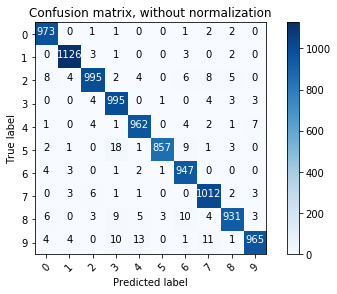

In [5]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Confusion matrix, without normalization')

plt.show()

>contrib.learn

<table>
    <tr>
<td>Operation</td> <td>Description</td>
    </tr>
    <tr>
<td>layers.sparse_column_with_keys()</td> <td>Handles the conversion of categorical values</td>
        </tr>
        <tr>
<td>layers.sparse_column_with_hash_bucket()</td> <td>Handles the conversion of categorical features
for which you don’t know all possible values</td>
            </tr>
            <tr>
<td>layers.crossed_column()</td> <td>Sets up feature crosses (interactions)</td>
                </tr>
                <tr>
<td>layers.bucketized_column()</td> <td>Turns a continuous column into a categorical
column</td>
                    </tr>
    </table>

In [6]:
import pandas as pd
N = 10000
weight = np.random.randn(N)*5+70
spec_id = np.random.randint(0,3,N)
bias = [0.9,1,1.1]
height = np.array([weight[i]/100 + bias[b] for i,b in enumerate(spec_id)])
spec_name = ['Goblin','Human','ManBears']
spec = [spec_name[s] for s in spec_id]

df = pd.DataFrame({'Species':spec,'Weight':weight,'Height':height})

from tensorflow.contrib import layers
Weight = layers.real_valued_column("Weight")
Species = layers.sparse_column_with_keys( column_name="Species", keys=['Goblin','Human','ManBears'])
reg = learn.LinearRegressor(feature_columns=[Weight,Species])

#have to transform the values into a TensorFlow Tensor inside the function.
def input_fn(df):
    feature_cols = {}
    feature_cols['Weight'] = tf.constant(df['Weight'].values)
    feature_cols['Species'] = tf.SparseTensor(indices=[[i, 0] for i in range(df['Species'].size)],values=df['Species'].values,
                                              dense_shape=[df['Species'].size, 1])
    labels = tf.constant(df['Height'].values)
    return feature_cols, labels

reg.fit(input_fn=lambda:input_fn(df), steps=50000)
w_w = reg.get_variable_value('linear/Weight/weight')
print('Estimation for Weight: {}'.format(w_w))
s_w = reg.get_variable_value('linear/Species/weights')
b = reg.get_variable_value('linear/bias_weight')
print('Estimation for Species: {}'.format(s_w + b))

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AA0D539A90>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\xcm\\AppData\\Local\\Temp\\tmpm52twh4d'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Savi

INFO:tensorflow:global_step/sec: 272.402
INFO:tensorflow:loss = 0.00059056864, step = 6700 (0.367 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 0.00057236344, step = 6800 (0.368 sec)
INFO:tensorflow:global_step/sec: 273.208
INFO:tensorflow:loss = 0.0005547197, step = 6900 (0.366 sec)
INFO:tensorflow:global_step/sec: 264.93
INFO:tensorflow:loss = 0.0005376188, step = 7000 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.263
INFO:tensorflow:loss = 0.00052104646, step = 7100 (0.376 sec)
INFO:tensorflow:global_step/sec: 270.994
INFO:tensorflow:loss = 0.00050498394, step = 7200 (0.368 sec)
INFO:tensorflow:global_step/sec: 267.909
INFO:tensorflow:loss = 0.0004894169, step = 7300 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.316
INFO:tensorflow:loss = 0.00047432928, step = 7400 (0.374 sec)
INFO:tensorflow:global_step/sec: 269.537
INFO:tensorflow:loss = 0.0004597075, step = 7500 (0.370 sec)
INFO:tensorflow:global_step/sec: 270.263
INFO:tensorflow:loss = 0.00044553622,

INFO:tensorflow:global_step/sec: 271.882
INFO:tensorflow:loss = 4.8239377e-05, step = 14700 (0.367 sec)
INFO:tensorflow:global_step/sec: 258.549
INFO:tensorflow:loss = 4.6752422e-05, step = 14800 (0.387 sec)
INFO:tensorflow:global_step/sec: 267.631
INFO:tensorflow:loss = 4.5311164e-05, step = 14900 (0.374 sec)
INFO:tensorflow:global_step/sec: 283.242
INFO:tensorflow:loss = 4.3914584e-05, step = 15000 (0.354 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 4.2560932e-05, step = 15100 (0.367 sec)
INFO:tensorflow:global_step/sec: 280.759
INFO:tensorflow:loss = 4.124901e-05, step = 15200 (0.356 sec)
INFO:tensorflow:global_step/sec: 283.664
INFO:tensorflow:loss = 3.9977433e-05, step = 15300 (0.354 sec)
INFO:tensorflow:global_step/sec: 263.169
INFO:tensorflow:loss = 3.874525e-05, step = 15400 (0.380 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 3.755096e-05, step = 15500 (0.367 sec)
INFO:tensorflow:global_step/sec: 274.705
INFO:tensorflow:loss = 3.6

INFO:tensorflow:loss = 4.0689592e-06, step = 22600 (0.390 sec)
INFO:tensorflow:global_step/sec: 263.169
INFO:tensorflow:loss = 3.9436713e-06, step = 22700 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.498
INFO:tensorflow:loss = 3.82226e-06, step = 22800 (0.377 sec)
INFO:tensorflow:global_step/sec: 273.631
INFO:tensorflow:loss = 3.704603e-06, step = 22900 (0.365 sec)
INFO:tensorflow:global_step/sec: 273.208
INFO:tensorflow:loss = 3.5905148e-06, step = 23000 (0.366 sec)
INFO:tensorflow:global_step/sec: 266.669
INFO:tensorflow:loss = 3.4799532e-06, step = 23100 (0.375 sec)
INFO:tensorflow:global_step/sec: 274.53
INFO:tensorflow:loss = 3.3728309e-06, step = 23200 (0.364 sec)
INFO:tensorflow:global_step/sec: 281.211
INFO:tensorflow:loss = 3.2690139e-06, step = 23300 (0.356 sec)
INFO:tensorflow:global_step/sec: 273.955
INFO:tensorflow:loss = 3.1683705e-06, step = 23400 (0.365 sec)
INFO:tensorflow:global_step/sec: 275.376
INFO:tensorflow:loss = 3.0708388e-06, step = 23500 (0.363 sec)
INFO:

INFO:tensorflow:global_step/sec: 267.529
INFO:tensorflow:loss = 3.3467316e-07, step = 30600 (0.375 sec)
INFO:tensorflow:global_step/sec: 270.993
INFO:tensorflow:loss = 3.2423875e-07, step = 30700 (0.368 sec)
INFO:tensorflow:global_step/sec: 264.558
INFO:tensorflow:loss = 3.1446498e-07, step = 30800 (0.379 sec)
INFO:tensorflow:global_step/sec: 272.036
INFO:tensorflow:loss = 3.0494942e-07, step = 30900 (0.368 sec)
INFO:tensorflow:global_step/sec: 261.575
INFO:tensorflow:loss = 2.956734e-07, step = 31000 (0.381 sec)
INFO:tensorflow:global_step/sec: 255.133
INFO:tensorflow:loss = 2.8657658e-07, step = 31100 (0.392 sec)
INFO:tensorflow:global_step/sec: 263.862
INFO:tensorflow:loss = 2.7763585e-07, step = 31200 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.669
INFO:tensorflow:loss = 2.6895862e-07, step = 31300 (0.374 sec)
INFO:tensorflow:global_step/sec: 261.795
INFO:tensorflow:loss = 2.6078558e-07, step = 31400 (0.382 sec)
INFO:tensorflow:global_step/sec: 280.861
INFO:tensorflow:loss = 2

INFO:tensorflow:loss = 2.8814451e-08, step = 38500 (0.368 sec)
INFO:tensorflow:global_step/sec: 280.077
INFO:tensorflow:loss = 2.7952375e-08, step = 38600 (0.356 sec)
INFO:tensorflow:global_step/sec: 277.749
INFO:tensorflow:loss = 2.7102983e-08, step = 38700 (0.360 sec)
INFO:tensorflow:global_step/sec: 270.263
INFO:tensorflow:loss = 2.6265054e-08, step = 38800 (0.370 sec)
INFO:tensorflow:global_step/sec: 276.134
INFO:tensorflow:loss = 2.5449973e-08, step = 38900 (0.363 sec)
INFO:tensorflow:global_step/sec: 270.993
INFO:tensorflow:loss = 2.4645223e-08, step = 39000 (0.368 sec)
INFO:tensorflow:global_step/sec: 262.48
INFO:tensorflow:loss = 2.3861249e-08, step = 39100 (0.381 sec)
INFO:tensorflow:global_step/sec: 284.162
INFO:tensorflow:loss = 2.3094358e-08, step = 39200 (0.352 sec)
INFO:tensorflow:global_step/sec: 277.044
INFO:tensorflow:loss = 2.2339355e-08, step = 39300 (0.362 sec)
INFO:tensorflow:global_step/sec: 265.258
INFO:tensorflow:loss = 2.1597442e-08, step = 39400 (0.377 sec)
IN

INFO:tensorflow:global_step/sec: 269.536
INFO:tensorflow:loss = 2.544005e-09, step = 46500 (0.371 sec)
INFO:tensorflow:global_step/sec: 285.956
INFO:tensorflow:loss = 2.4692712e-09, step = 46600 (0.350 sec)
INFO:tensorflow:global_step/sec: 283.058
INFO:tensorflow:loss = 2.3954816e-09, step = 46700 (0.353 sec)
INFO:tensorflow:global_step/sec: 271.727
INFO:tensorflow:loss = 2.3234623e-09, step = 46800 (0.368 sec)
INFO:tensorflow:global_step/sec: 278.442
INFO:tensorflow:loss = 2.2515145e-09, step = 46900 (0.360 sec)
INFO:tensorflow:global_step/sec: 279.212
INFO:tensorflow:loss = 2.1812145e-09, step = 47000 (0.357 sec)
INFO:tensorflow:global_step/sec: 261.116
INFO:tensorflow:loss = 2.112252e-09, step = 47100 (0.383 sec)
INFO:tensorflow:global_step/sec: 274.705
INFO:tensorflow:loss = 2.0443196e-09, step = 47200 (0.364 sec)
INFO:tensorflow:global_step/sec: 274.705
INFO:tensorflow:loss = 1.9774136e-09, step = 47300 (0.365 sec)
INFO:tensorflow:global_step/sec: 260.435
INFO:tensorflow:loss = 1.

In [7]:
#CNN
from tensorflow.contrib import learn
import tensorflow as tf

import sys
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data


def model_fn(x, target, mode, params):
    y_ = tf.cast(target, tf.float32)
    x_image = tf.reshape(x, [-1, 28, 28, 1])

#indicate the number of feature maps (32), the size of the filter (5×5), and the
#activation function (relu), and initialize the weights and biases

    conv1 = layers.convolution2d(x_image, 32, [5,5], activation_fn=tf.nn.relu, biases_initializer=tf.constant_initializer(0.1),
                             weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool1 = layers.max_pool2d(conv1, [2,2])

    conv2 = layers.convolution2d(pool1, 64, [5,5], activation_fn=tf.nn.relu,biases_initializer=tf.constant_initializer(0.1),
                             weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    pool2 = layers.max_pool2d(conv2, [2,2])

    pool2_flat = tf.reshape(pool2, [-1, 7*7*64])
    fc1 = layers.fully_connected(pool2_flat, 1024,activation_fn=tf.nn.relu,biases_initializer=tf.constant_initializer(0.1),
                             weights_initializer=tf.truncated_normal_initializer(stddev=0.1))
    fc1_drop = layers.dropout(fc1, keep_prob=params["dropout"], is_training=(mode == 'train'))
    y_conv = layers.fully_connected(fc1_drop, 10, activation_fn=None)
    cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))
    train_op = tf.contrib.layers.optimize_loss( loss=cross_entropy, global_step=tf.contrib.framework.get_global_step(),
                                               learning_rate=params["learning_rate"],
                                               optimizer="Adam")
    predictions = tf.argmax(y_conv, 1)
    return predictions, cross_entropy, train_op

DATA_DIR = 'data'
data = input_data.read_data_sets(DATA_DIR, one_hot=True)
x_data, y_data = data.train.images,data.train.labels.astype(np.int32)

tf.cast(x_data,tf.float32)
tf.cast(y_data,tf.float32)
model_params = {"learning_rate": 1e-4, "dropout": 0.5}

CNN = tf.contrib.learn.Estimator(model_fn=model_fn, params=model_params)
print("Starting training for %s steps max" % 5000)
CNN.fit(x=data.train.images,y=data.train.labels, batch_size=50,max_steps=5000)
test_acc = 0
for ii in range(5):
    batch = data.test.next_batch(2000)
    predictions = list(CNN.predict(batch[0], as_iterable=True))
    test_acc = test_acc + (np.argmax(batch[1],1) == predictions).mean()

print(test_acc/5)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AA00137EB8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\xcm\\AppData\\Local\\Temp\\tmptwk9vpj2'}
Starting training for 5000

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\xcm\AppData\Local\Temp\tmptwk9vpj2\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.9872
